In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

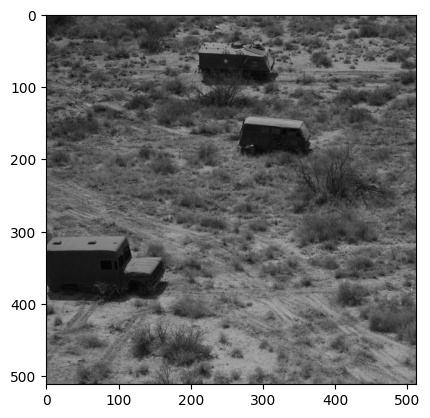

In [5]:
image = cv2.imread('./imgs/7.1.06.tiff')

plt.imshow(image)
plt.show()

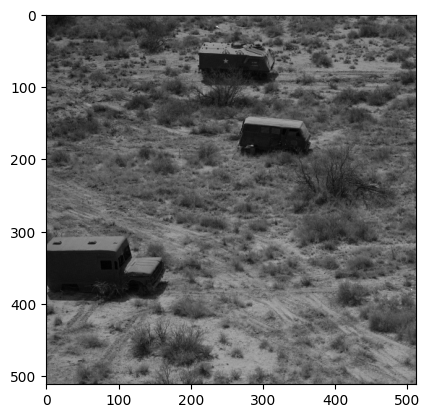

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

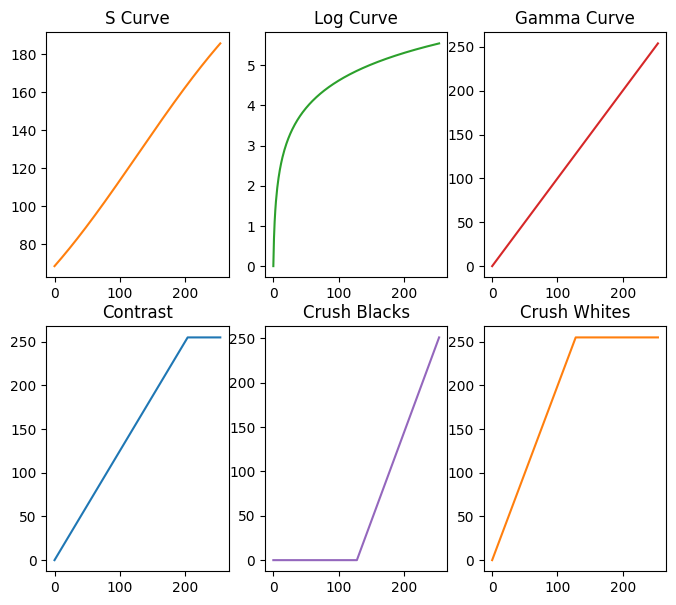

In [17]:
def s_curve(x, a: float = 1):
    x -= 128
    x /= 128
    return 255 / (1 + np.exp(-a * x))


def log_curve(x, a: float = 1):
    return np.log(1 + a * x)


def gamma_curve(x, gamma: float = 1):
    return 255 * np.power(x / 255, gamma)


def contrast(x, alpha: float = 1.25):
    return max(0, min(alpha * x, 255))


def crush_blacks(x, cutoff_point: int = 128):
    return 0 if x < cutoff_point else (x - cutoff_point) * (255 / cutoff_point)


def crush_whites(x, cutoff_point: int = 128):
    return 255 if x > cutoff_point else x * (255 / cutoff_point)


# plot all curves
def gen_data(
    x_range: range,
    fx,
):
    image = []
    domain = []
    for i in x_range:
        image.append(fx(x=i))
        domain.append(i)
    return domain, image


s_curve_x, s_curve_y = gen_data(range(0, 255), s_curve)
log_curve_x, log_curve_y = gen_data(range(0, 255), log_curve)
gamma_curve_x, gamma_curve_y = gen_data(range(0, 255), gamma_curve)
contrast_x, contrast_y = gen_data(range(0, 255), contrast)
crush_blacks_x, crush_blacks_y = gen_data(range(0, 255), crush_blacks)
crush_whites_x, crush_whites_y = gen_data(range(0, 255), crush_whites)

fig, axs = plt.subplots(2, 3, figsize=(8, 7))

axs[0, 0].set_title("S Curve")
axs[0, 0].plot(s_curve_x, s_curve_y, 'tab:orange')

axs[0, 1].set_title("Log Curve")
axs[0, 1].plot(log_curve_x, log_curve_y,'tab:green')

axs[0, 2].set_title("Gamma Curve")
axs[0, 2].plot(gamma_curve_x, gamma_curve_y,'tab:red')

axs[1, 0].set_title("Contrast")
axs[1, 0].plot(contrast_x, contrast_y,'tab:blue')

axs[1, 1].set_title("Crush Blacks")
axs[1, 1].plot(crush_blacks_x, crush_blacks_y,'tab:purple')

axs[1, 2].set_title("Crush Whites")
axs[1, 2].plot(crush_whites_x, crush_whites_y,'tab:orange')

plt.show()

In [30]:
def apply_to_img(img,data):
    shape = img.shape
    new_img = np.zeros(shape, dtype="uint8")
    for x in range(shape[0]):
        for y in range(shape[1]):
            index = img[x,y]
            new_img[x,y] = data[index]
    return new_img

In [31]:
# get all curves and apply them to the img

_, s_curve_y = gen_data(range(0, 255), s_curve)
_, log_curve_y = gen_data(range(0, 255), log_curve)
_, gamma_curve_y = gen_data(range(0, 255), gamma_curve)
_, contrast_y = gen_data(range(0, 255), contrast)
_, crush_blacks_y = gen_data(range(0, 255), crush_blacks)
_, crush_whites_y = gen_data(range(0, 255), crush_whites)


s_curve_img = apply_to_img(gray, s_curve_y)
log_curve_img = apply_to_img(gray, log_curve_y)
gamma_curve_img = apply_to_img(gray, gamma_curve_y)
contrast_img = apply_to_img(gray, contrast_y)
crush_blacks_img = apply_to_img(gray, crush_blacks_y)
crush_whites_img = apply_to_img(gray, crush_whites_y)

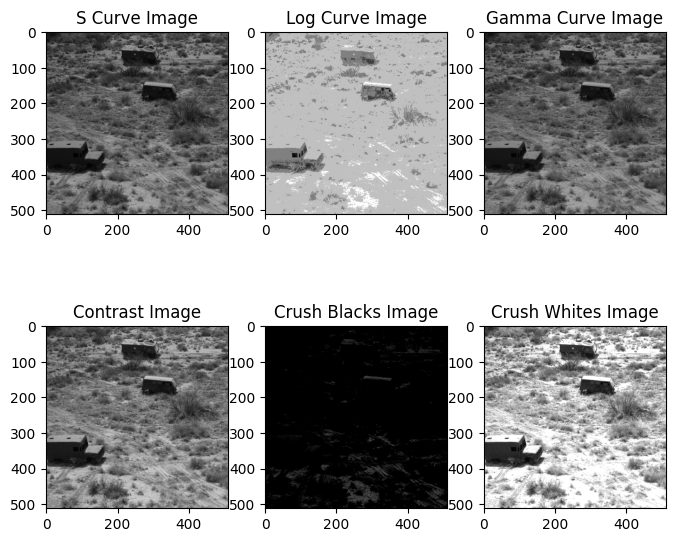

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(8, 7))
axs[0, 0].set_title("S Curve Image")
axs[0, 0].imshow(s_curve_img, cmap="gray")
axs[0, 1].set_title("Log Curve Image")
axs[0, 1].imshow(log_curve_img, cmap="gray")
axs[0, 2].set_title("Gamma Curve Image")
axs[0, 2].imshow(gamma_curve_img, cmap="gray")
axs[1, 0].set_title("Contrast Image")
axs[1, 0].imshow(contrast_img, cmap="gray")
axs[1, 1].set_title("Crush Blacks Image")
axs[1, 1].imshow(crush_blacks_img, cmap="gray")
axs[1, 2].set_title("Crush Whites Image")
axs[1, 2].imshow(crush_whites_img, cmap="gray")
plt.show()